In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
import time
import matplotlib.pyplot as plt

In [2]:
def int1(x, a):
    return np.exp(-((x - a)** 2)/(4 * a)) * np.tanh(x/2)

In [3]:
def h_1(v_1, dc = 2):
    return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)

In [4]:
def int2(x, a):
    return np.exp(-(x - a)** 2/(4 * a)) * (np.tanh(x/2)) ** 3

In [5]:
def h_3(v_2, dc = 2):
    return (1/(4 * np.pi * v_2) ** (1/2) * quad(int2, -np.inf, np.inf, args = (v_2))[0]) ** (dc - 1)

In [6]:
def int3(x, a):
    return np.exp(-(x - a)** 2/(4 * a)) * (np.tanh(x/2)) ** 5

In [7]:
def h_5(v_3, dc = 2):
    return (1/(4 * np.pi * v_3) ** (1/2) * quad(int3, -np.inf, np.inf, args = (v_3))[0]) ** (dc - 1)

In [8]:
def int4(x, a):
    return np.exp(-(x - a)** 2/(4 * a)) * np.log(np.tanh(np.abs(x) / 2))

In [9]:
def h_4(v_3, dc):
    return (1/(4 * np.pi * v_3) ** (1/2) * quad(int4, -np.inf, np.inf, args = (v_3))[0]) * (dc - 1)

In [10]:
def f123(vars, dc = 3):
    a, b, c = vars
    h_1_ = a * (h_1(b, dc)) + (1 - a) * (h_1(c, dc))
    h_2_ = a * (h_3(b, dc)) + (1 - a) * (h_3(c, dc))
    h_3_ = a * (h_5(b, dc)) + (1 - a) * (h_5(c, dc))
    return [h_1_, h_2_, h_3_]


def const_gen(mu, dc):
    return [h_1(mu, dc), h_3(mu, dc), h_5(mu, dc)]


dc = 3
def solver(eq, dc, mu):
    num = const_gen(mu, dc)
    
    solution = fsolve(eq, num)
    return solution
solution = solver(f123, dc, 2)
solution

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_58542/613505132.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_58542/1837958142.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-((x - a)** 2)/(4 * a)) * np.tanh(x/2)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_58542/613505132.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warn

array([0.3029407 , 0.1741863 , 0.11893227])

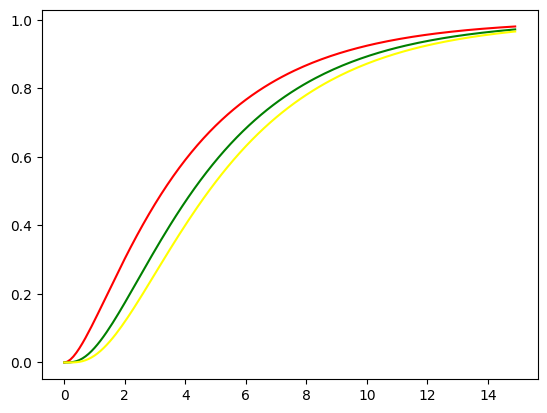

In [11]:
mu = np.arange(1e-5, 15, 0.1)
res_1 = [0] * len(mu)
res_2 = [0] * len(mu)
res_3 = [0] * len(mu)
for i in range(len(mu)):
    res_1[i] = h_1(mu[i], dc = 3)
    res_2[i] = h_3(mu[i], dc = 3)
    res_3[i] = h_5(mu[i], dc = 3)

plt.plot(mu, res_1, 'red')
plt.plot(mu, res_2, 'green')
plt.plot(mu, res_3, 'yellow')

In [12]:
mu = np.arange(1, 100, 1)
ans = np.zeros(shape = (mu.size, 3))
mse = np.zeros(mu.size)

In [29]:
dc = 3
for i in range(len(mu)):
    ans[i] = solver(f123, dc, mu[i])
    
    res = np.array([a * h_1(b, dc) + (1 - a) * h_1(c, dc), 
                    a * h_3(b, dc) + (1 - a) * h_3(c, dc),
                    a * h_5(b, dc) + (1 - a) * h_5(c, dc)])
    mse[i] = np.linalg.norm(res, 2)

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_58542/613505132.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_58542/1837958142.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-((x - a)** 2)/(4 * a)) * np.tanh(x/2)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_58542/613505132.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)


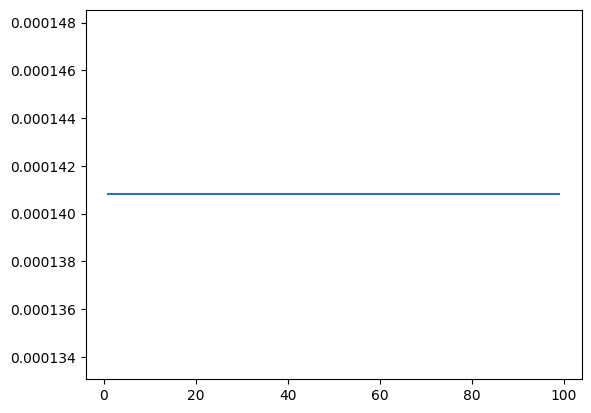

In [30]:
plt.plot(mu, mse)

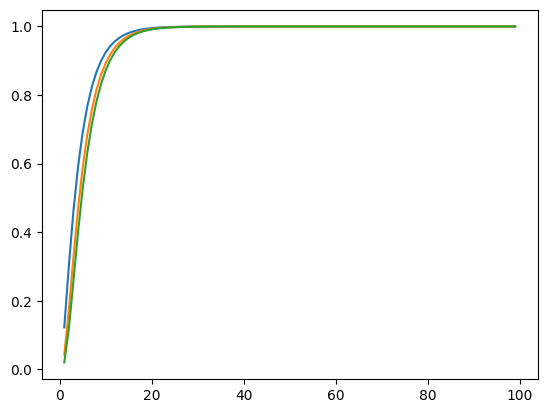

In [15]:
for i in range(len(ans[1])):
    plt.plot(mu, ans[:, i])

In [16]:
def h_1_for_numpy(x, dc):
    ans = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(x[1])):
            ans[i, j] = (1/(4 * np.pi * x[i, j]) ** (1/2) * 
                         quad(int1, -np.inf, np.inf, args = (x[i, j]))[0]) ** (dc - 1)
    return ans

In [17]:
def h_3_for_numpy(x, dc):
    ans = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(x[1])):
            ans[i, j] = (1/(4 * np.pi * x[i, j]) ** (1/2) * 
                         quad(int2, -np.inf, np.inf, args = (x[i, j]))[0]) ** (dc - 1)
    return ans

In [18]:
def h_5_for_numpy(x, dc):
    ans = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(x[1])):
            ans[i, j] = (1/(4 * np.pi * x[i, j]) ** (1/2) * 
                         quad(int3, -np.inf, np.inf, args = (x[i, j]))[0]) ** (dc - 1)
    return ans

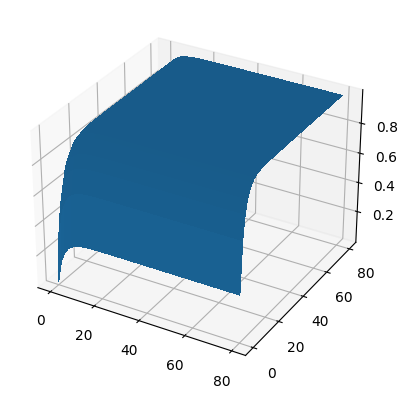

In [19]:
#рисуем поверхность z1 посмотреть пересечение с плоскостью z_1 = f_1(mu)
from mpl_toolkits import mplot3d
ax = plt.axes(projection ='3d')

dc = 9
a = 0.3
X = np.linspace(0.01, 80, 50)
Y = np.linspace(0.01, 80, 50)
fin = np.zeros(shape = (2500, 2))
count = 0
X, Y = np.meshgrid(X, Y)
Z = a *h_1_for_numpy(X, 2) + (1 - a) *  h_1_for_numpy(Y, 2)
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
#ax.plot_surface(fin[:, 0], fin[:, 1], z_2)

plt.show()

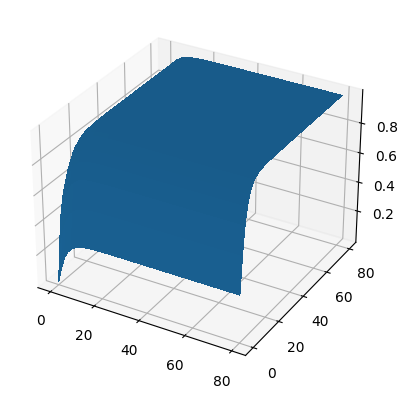

In [20]:
#рисуем поверхность z1 посмотреть пересечение с плоскостью z_1 = f_1(mu)
from mpl_toolkits import mplot3d
ax = plt.axes(projection ='3d')

dc = 9
a = 0.3
X = np.linspace(0.01, 80, 50)
Y = np.linspace(0.01, 80, 50)
fin = np.zeros(shape = (2500, 2))
count = 0
X, Y = np.meshgrid(X, Y)
Z = a *h_3_for_numpy(X, 2) + (1 - a) *  h_3_for_numpy(Y, 2)
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
#ax.plot_surface(fin[:, 0], fin[:, 1], z_2)

plt.show()

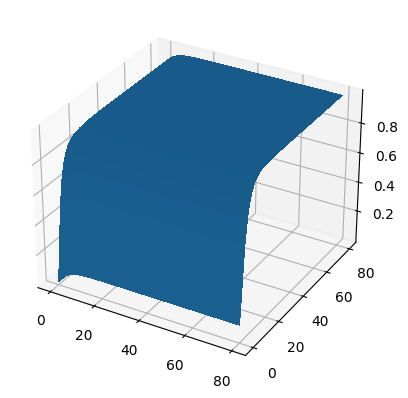

In [21]:
#рисуем поверхность z1 посмотреть пересечение с плоскостью z_1 = f_1(mu)
from mpl_toolkits import mplot3d
ax = plt.axes(projection ='3d')

dc = 3
a = 0.1
X = np.linspace(0.01, 80, 50)
Y = np.linspace(0.01, 80, 50)
fin = np.zeros(shape = (2500, 2))
count = 0
X, Y = np.meshgrid(X, Y)
Z = a *h_5_for_numpy(X, 2) + (1 - a) *  h_5_for_numpy(Y, 2)
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
#ax.plot_surface(fin[:, 0], fin[:, 1], z_2)

plt.show()